In [1]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA

from asteria.simulation import Simulation
from scan import *
from plthelper import *
import astropy.units as u

import matplotlib.pyplot as plt

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


In [2]:
dist_ini = 5 * u.kpc

sim_dt = 1 * u.ms
res_dt = 1 * u.ms

add_wls = True
detector_scope = "Gen2"
trials = 10000

model = {'name': 'Sukhbold_2015',
         'param':{
             'progenitor_mass': 27*u.Msun, 
             'eos': 'LS220'}
        }

ampl_range = np.arange(10,105,5)*1/100
freq_range = np.arange(80,410,10) * u.Hz

ampl_range = np.arange(10,105,5)*1/100
freq_range = np.arange(80,410,10) * u.Hz

time_start = 150*u.ms
time_end = 300*u.ms
position = "center"

sigma = [3,5]

scan_para = {"freq_range": freq_range, 
             "ampl_range": ampl_range, #in percent of max value
             "time_start": time_start,
             "time_end": time_end,
             "position": position,
             "sigma": sigma}


time_win = [0, 0.35] * u.s # time independent
freq_res = 1 * u.Hz 
freq_win = [75, 1E6] * u.Hz # freq independent
hanning = False

fft_para = {"time_res": res_dt, 
             "time_win": time_win,
             "freq_res": time_start,
             "freq_win": freq_win,
             "hanning": hanning}

hann_len = 100*u.ms # length of Hann window
hann_res = 5*u.Hz # relates to frequency resolution from hanning, mfft = freq_sam/freq_sam
hann_hop = 20*u.ms # offset by which Hann window is slided over signal
freq_sam = (1/res_dt).to(u.Hz) # = 1/time_res
time_int = True

stf_para = {"hann_len": hann_len,
             "hann_res": hann_res,
             "hann_hop": hann_hop, 
             "freq_sam": freq_sam,
             "time_int": time_int}

sim = Simulation(model=model,
                 distance=dist_ini, 
                 res_dt=res_dt,
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=0.000*u.s, tmax=1.000*u.s, dt=sim_dt,
                 hierarchy = 'normal',
                 mixing_scheme = 'NoTransformation',
                 detector_scope = detector_scope,
                 add_wls = add_wls)
sim.run()

The first method uses a minimizer to find the bounds for which the significance is roughly between 3 and 5 sigma, simulates for 10 distances the significance and then interpolates to fit the exactly 3 (5) sigma. This is about 6 times faster than directly fitting the significance horizon for each subdetector as well as for the quantiles. When comparing this to a direct fit method, we find that the significance horizon differs by no more than 0.1 kpc and is more robust. There were incidences with the direct fit method where the fitted significance horizon was clearly too large.

Frequency: 80.0 Hz, Amplitude: 10.0 % 
Distance range: 7.0 kpc - 22.3 kpc
Distance: 7.0 kpc
Distance: 8.7 kpc
Distance: 10.4 kpc
Distance: 12.1 kpc
Distance: 13.8 kpc
Distance: 15.5 kpc
Distance: 17.2 kpc
Distance: 18.9 kpc
Distance: 20.6 kpc
Distance: 22.3 kpc


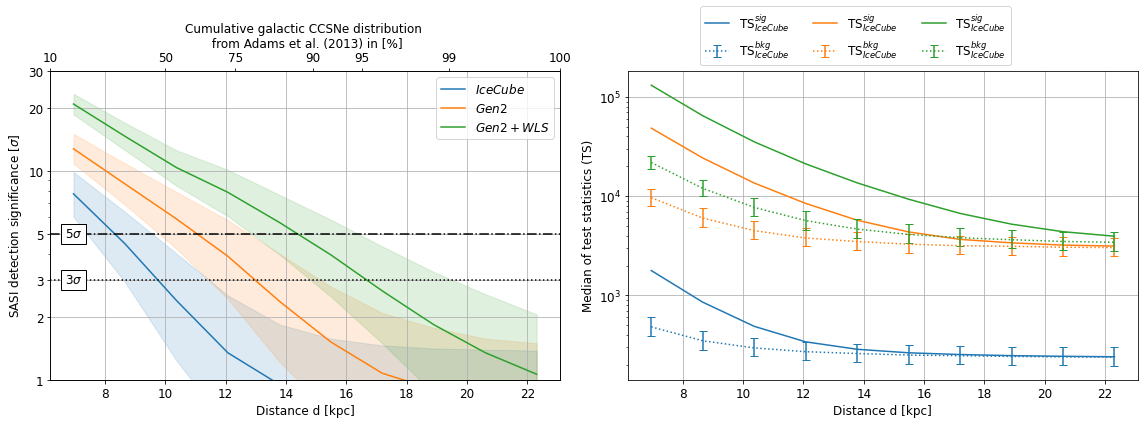

ic86
gen2
wls
3sig distance horizon IC86: 9.8 kpc
3sig distance horizon Gen2: 13.0 kpc
3sig distance horizon Gen2+WLS: 16.7 kpc
5sig distance horizon IC86: 8.3 kpc
5sig distance horizon Gen2: 11.1 kpc
5sig distance horizon Gen2+WLS: 14.4 kpc
Frequency: 90.0 Hz, Amplitude: 10.0 % 
Distance range: 7.2 kpc - 23.0 kpc
Distance: 7.2 kpc
Distance: 9.0 kpc
Distance: 10.7 kpc
Distance: 12.5 kpc
Distance: 14.2 kpc
Distance: 16.0 kpc
Distance: 17.7 kpc
Distance: 19.5 kpc
Distance: 21.2 kpc
Distance: 23.0 kpc


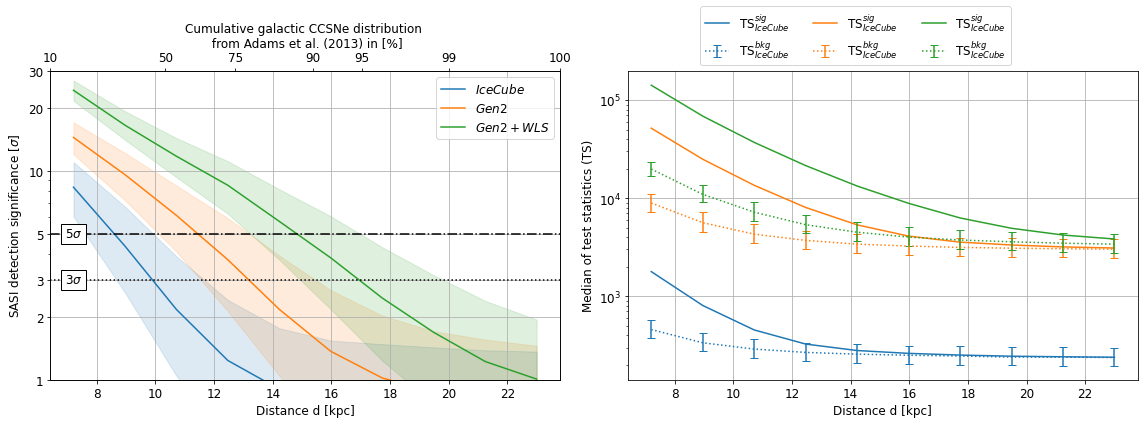

ic86
gen2
wls
3sig distance horizon IC86: 9.9 kpc
3sig distance horizon Gen2: 13.2 kpc
3sig distance horizon Gen2+WLS: 17.0 kpc
5sig distance horizon IC86: 8.6 kpc
5sig distance horizon Gen2: 11.5 kpc
5sig distance horizon Gen2+WLS: 14.8 kpc
Frequency: 100.0 Hz, Amplitude: 10.0 % 
Distance range: 6.4 kpc - 21.9 kpc
Distance: 6.4 kpc
Distance: 8.1 kpc
Distance: 9.8 kpc
Distance: 11.6 kpc
Distance: 13.3 kpc
Distance: 15.0 kpc
Distance: 16.7 kpc
Distance: 18.5 kpc
Distance: 20.2 kpc
Distance: 21.9 kpc


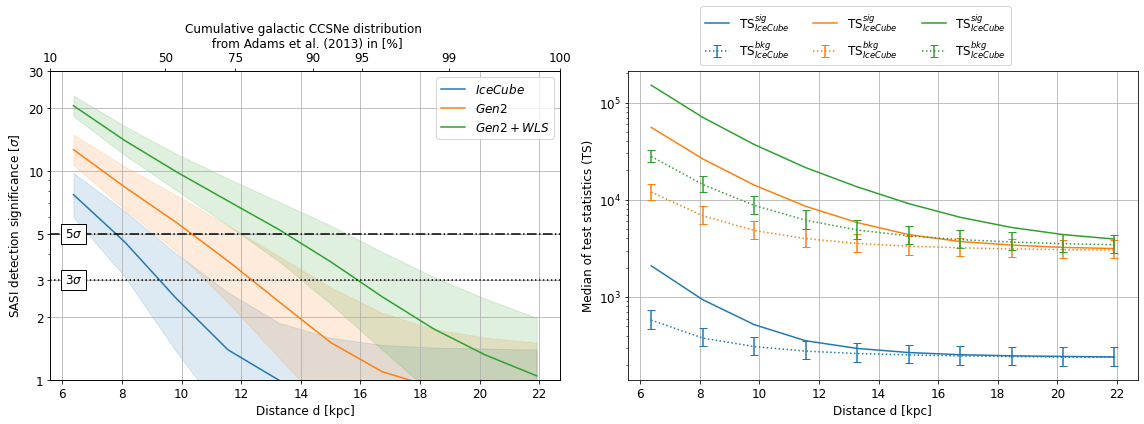

ic86
gen2
wls
3sig distance horizon IC86: 9.3 kpc
3sig distance horizon Gen2: 12.4 kpc
3sig distance horizon Gen2+WLS: 15.9 kpc
5sig distance horizon IC86: 7.8 kpc
5sig distance horizon Gen2: 10.4 kpc
5sig distance horizon Gen2+WLS: 13.5 kpc
Frequency: 110.0 Hz, Amplitude: 10.0 % 
Distance range: 6.5 kpc - 21.7 kpc
Distance: 6.5 kpc
Distance: 8.2 kpc
Distance: 9.9 kpc
Distance: 11.6 kpc
Distance: 13.3 kpc
Distance: 15.0 kpc
Distance: 16.7 kpc
Distance: 18.4 kpc
Distance: 20.1 kpc
Distance: 21.7 kpc


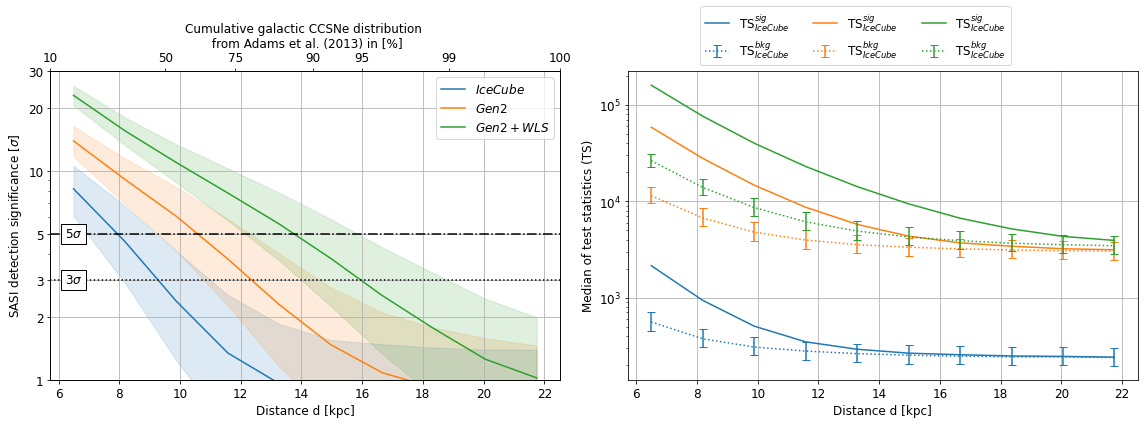

ic86
gen2
wls
3sig distance horizon IC86: 9.3 kpc
3sig distance horizon Gen2: 12.4 kpc
3sig distance horizon Gen2+WLS: 16.0 kpc
5sig distance horizon IC86: 8.0 kpc
5sig distance horizon Gen2: 10.6 kpc
5sig distance horizon Gen2+WLS: 13.8 kpc
Frequency: 120.0 Hz, Amplitude: 10.0 % 
Distance range: 6.0 kpc - 21.4 kpc
Distance: 6.0 kpc
Distance: 7.7 kpc
Distance: 9.4 kpc
Distance: 11.1 kpc
Distance: 12.8 kpc
Distance: 14.5 kpc
Distance: 16.2 kpc
Distance: 17.9 kpc
Distance: 19.7 kpc
Distance: 21.4 kpc


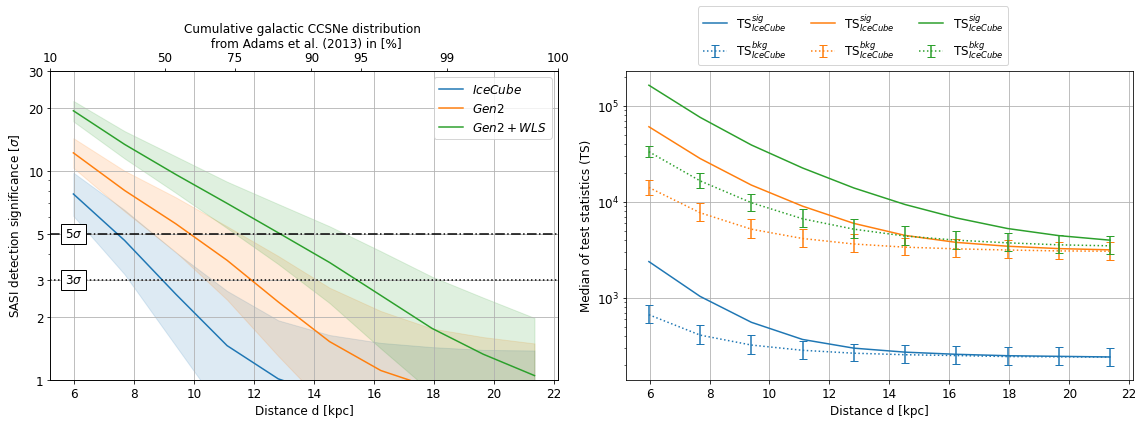

ic86
gen2
wls
3sig distance horizon IC86: 9.0 kpc
3sig distance horizon Gen2: 11.9 kpc
3sig distance horizon Gen2+WLS: 15.5 kpc
5sig distance horizon IC86: 7.5 kpc
5sig distance horizon Gen2: 9.9 kpc
5sig distance horizon Gen2+WLS: 12.9 kpc
Frequency: 130.0 Hz, Amplitude: 10.0 % 
Distance range: 6.3 kpc - 21.2 kpc
Distance: 6.3 kpc
Distance: 8.0 kpc
Distance: 9.7 kpc
Distance: 11.3 kpc
Distance: 13.0 kpc
Distance: 14.6 kpc
Distance: 16.3 kpc
Distance: 17.9 kpc
Distance: 19.6 kpc
Distance: 21.2 kpc


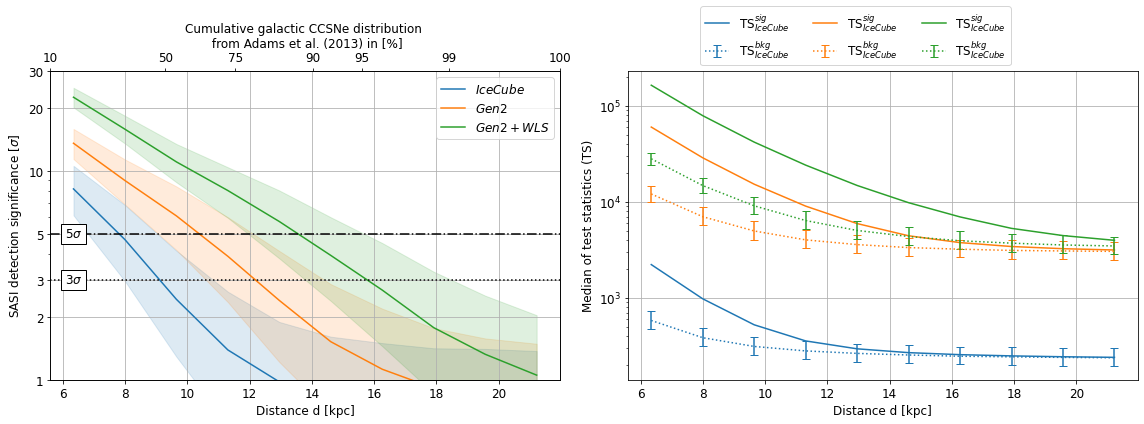

ic86
gen2
wls
3sig distance horizon IC86: 9.1 kpc
3sig distance horizon Gen2: 12.2 kpc
3sig distance horizon Gen2+WLS: 15.8 kpc
5sig distance horizon IC86: 7.8 kpc
5sig distance horizon Gen2: 10.4 kpc
5sig distance horizon Gen2+WLS: 13.6 kpc
Frequency: 140.0 Hz, Amplitude: 10.0 % 
Distance range: 6.0 kpc - 21.6 kpc
Distance: 6.0 kpc
Distance: 7.7 kpc
Distance: 9.4 kpc
Distance: 11.2 kpc
Distance: 12.9 kpc
Distance: 14.6 kpc
Distance: 16.4 kpc
Distance: 18.1 kpc
Distance: 19.8 kpc
Distance: 21.6 kpc


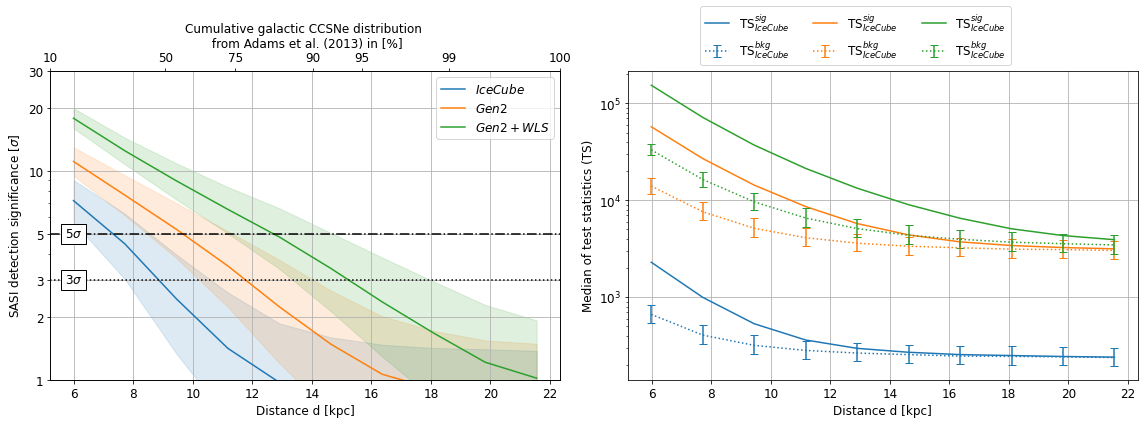

ic86
gen2
wls
3sig distance horizon IC86: 8.9 kpc
3sig distance horizon Gen2: 11.8 kpc
3sig distance horizon Gen2+WLS: 15.2 kpc
5sig distance horizon IC86: 7.4 kpc
5sig distance horizon Gen2: 9.7 kpc
5sig distance horizon Gen2+WLS: 12.7 kpc
Frequency: 150.0 Hz, Amplitude: 10.0 % 
Distance range: 5.9 kpc - 21.2 kpc
Distance: 5.9 kpc
Distance: 7.6 kpc
Distance: 9.3 kpc
Distance: 11.0 kpc
Distance: 12.7 kpc
Distance: 14.4 kpc
Distance: 16.1 kpc
Distance: 17.8 kpc
Distance: 19.5 kpc
Distance: 21.2 kpc


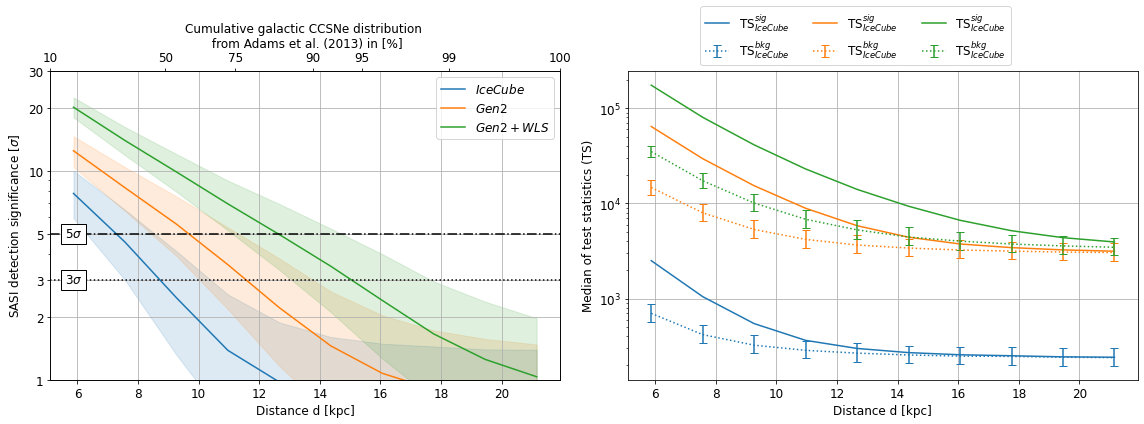

ic86
gen2
wls
3sig distance horizon IC86: 8.7 kpc
3sig distance horizon Gen2: 11.6 kpc
3sig distance horizon Gen2+WLS: 15.1 kpc
5sig distance horizon IC86: 7.3 kpc
5sig distance horizon Gen2: 9.7 kpc
5sig distance horizon Gen2+WLS: 12.6 kpc
Frequency: 160.0 Hz, Amplitude: 10.0 % 
Distance range: 5.7 kpc - 20.8 kpc
Distance: 5.7 kpc
Distance: 7.4 kpc
Distance: 9.0 kpc
Distance: 10.7 kpc
Distance: 12.4 kpc
Distance: 14.1 kpc
Distance: 15.8 kpc
Distance: 17.5 kpc
Distance: 19.1 kpc
Distance: 20.8 kpc


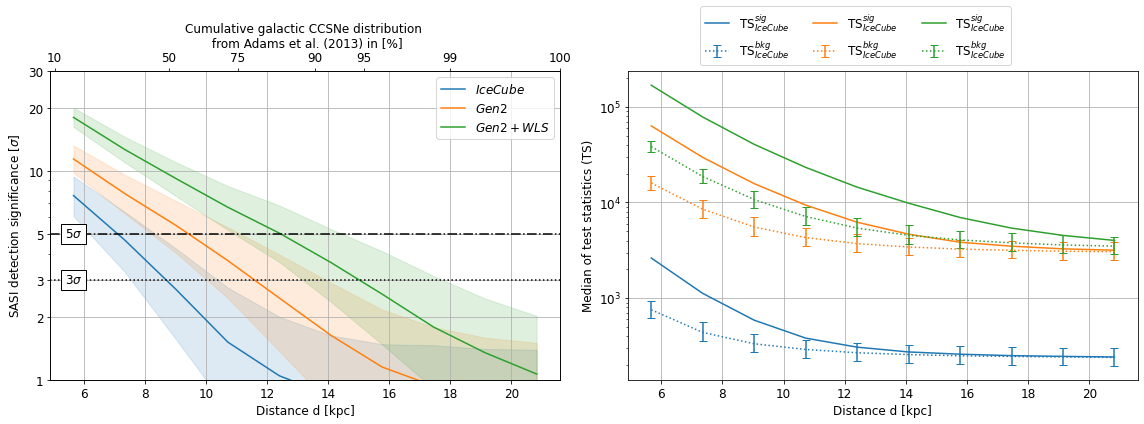

ic86
gen2
wls
3sig distance horizon IC86: 8.7 kpc
3sig distance horizon Gen2: 11.6 kpc
3sig distance horizon Gen2+WLS: 15.0 kpc
5sig distance horizon IC86: 7.1 kpc
5sig distance horizon Gen2: 9.4 kpc
5sig distance horizon Gen2+WLS: 12.4 kpc
Frequency: 170.0 Hz, Amplitude: 10.0 % 
Distance range: 5.7 kpc - 20.6 kpc
Distance: 5.7 kpc
Distance: 7.3 kpc
Distance: 9.0 kpc
Distance: 10.7 kpc
Distance: 12.3 kpc
Distance: 14.0 kpc
Distance: 15.7 kpc
Distance: 17.3 kpc
Distance: 19.0 kpc
Distance: 20.6 kpc


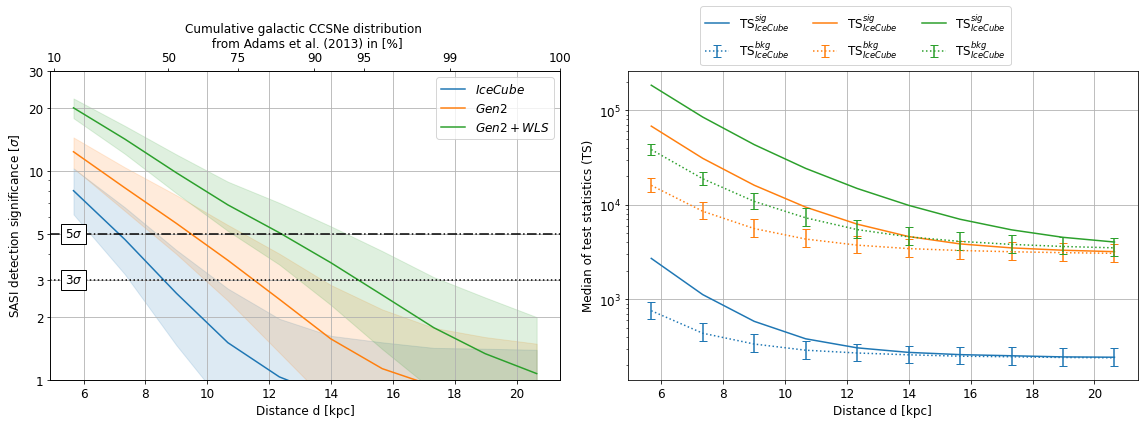

ic86
gen2
wls
3sig distance horizon IC86: 8.6 kpc
3sig distance horizon Gen2: 11.5 kpc
3sig distance horizon Gen2+WLS: 14.9 kpc
5sig distance horizon IC86: 7.2 kpc
5sig distance horizon Gen2: 9.5 kpc
5sig distance horizon Gen2+WLS: 12.4 kpc
Frequency: 180.0 Hz, Amplitude: 10.0 % 
Distance range: 5.6 kpc - 20.6 kpc
Distance: 5.6 kpc
Distance: 7.3 kpc
Distance: 8.9 kpc
Distance: 10.6 kpc
Distance: 12.3 kpc
Distance: 13.9 kpc
Distance: 15.6 kpc
Distance: 17.2 kpc
Distance: 18.9 kpc
Distance: 20.6 kpc


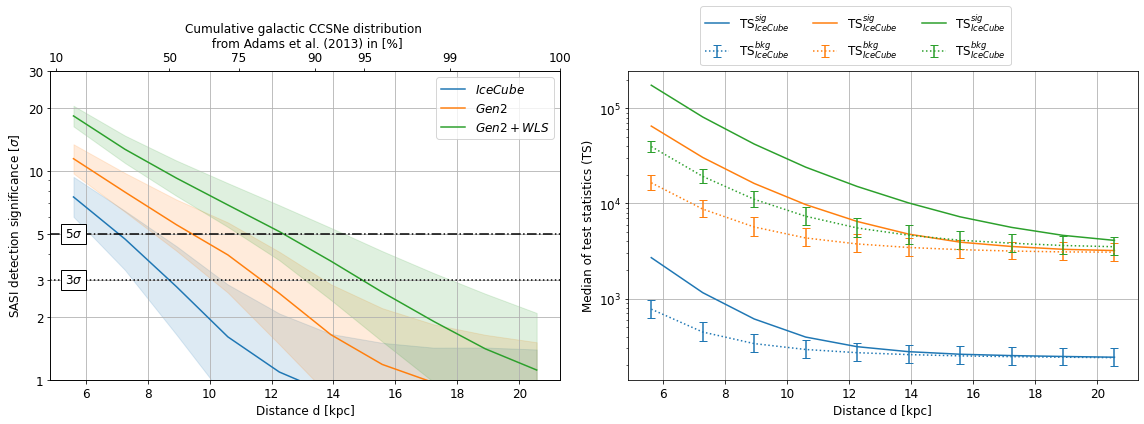

ic86
gen2
wls
3sig distance horizon IC86: 8.7 kpc
3sig distance horizon Gen2: 11.7 kpc
3sig distance horizon Gen2+WLS: 14.9 kpc
5sig distance horizon IC86: 7.1 kpc
5sig distance horizon Gen2: 9.4 kpc
5sig distance horizon Gen2+WLS: 12.4 kpc
Frequency: 190.0 Hz, Amplitude: 10.0 % 
Distance range: 5.9 kpc - 20.8 kpc
Distance: 5.9 kpc
Distance: 7.5 kpc
Distance: 9.2 kpc
Distance: 10.8 kpc
Distance: 12.5 kpc
Distance: 14.2 kpc
Distance: 15.8 kpc
Distance: 17.5 kpc
Distance: 19.2 kpc
Distance: 20.8 kpc


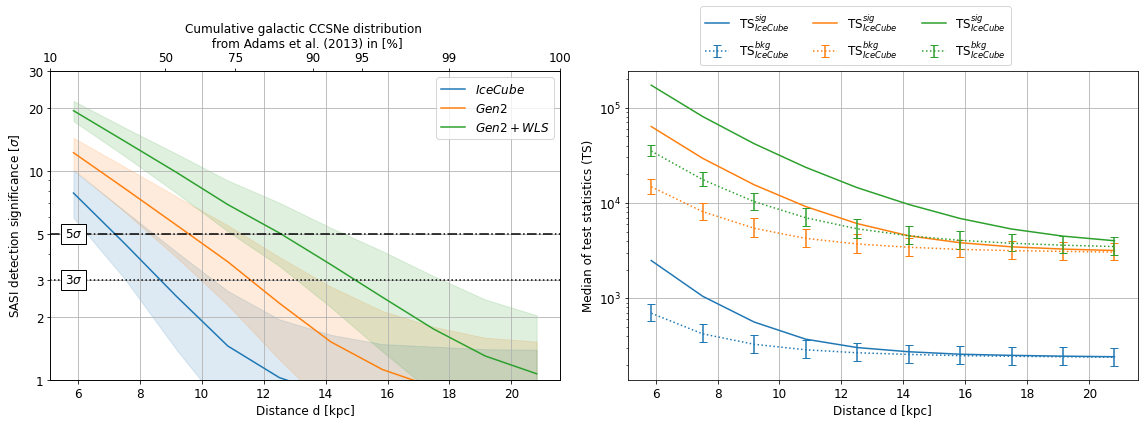

ic86
gen2
wls
3sig distance horizon IC86: 8.7 kpc
3sig distance horizon Gen2: 11.6 kpc
3sig distance horizon Gen2+WLS: 15.0 kpc
5sig distance horizon IC86: 7.2 kpc
5sig distance horizon Gen2: 9.6 kpc
5sig distance horizon Gen2+WLS: 12.6 kpc
Frequency: 200.0 Hz, Amplitude: 10.0 % 
Distance range: 5.6 kpc - 20.9 kpc
Distance: 5.6 kpc
Distance: 7.3 kpc
Distance: 9.0 kpc
Distance: 10.7 kpc
Distance: 12.4 kpc
Distance: 14.1 kpc
Distance: 15.8 kpc
Distance: 17.5 kpc
Distance: 19.2 kpc
Distance: 20.9 kpc


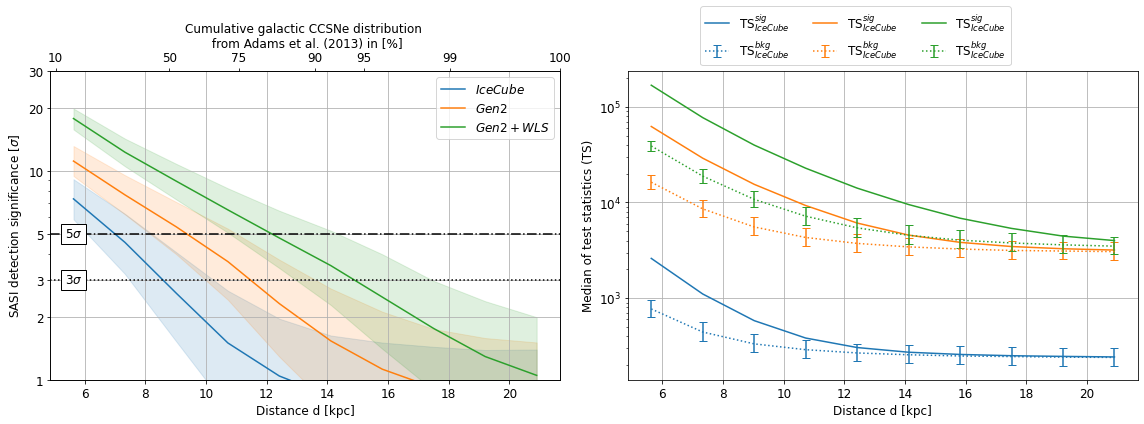

ic86
gen2
wls
3sig distance horizon IC86: 8.6 kpc
3sig distance horizon Gen2: 11.5 kpc
3sig distance horizon Gen2+WLS: 14.9 kpc
5sig distance horizon IC86: 7.0 kpc
5sig distance horizon Gen2: 9.4 kpc
5sig distance horizon Gen2+WLS: 12.2 kpc
Frequency: 210.0 Hz, Amplitude: 10.0 % 
Distance range: 5.8 kpc - 20.7 kpc
Distance: 5.8 kpc
Distance: 7.5 kpc
Distance: 9.1 kpc
Distance: 10.8 kpc
Distance: 12.5 kpc
Distance: 14.1 kpc
Distance: 15.8 kpc
Distance: 17.4 kpc
Distance: 19.1 kpc
Distance: 20.7 kpc


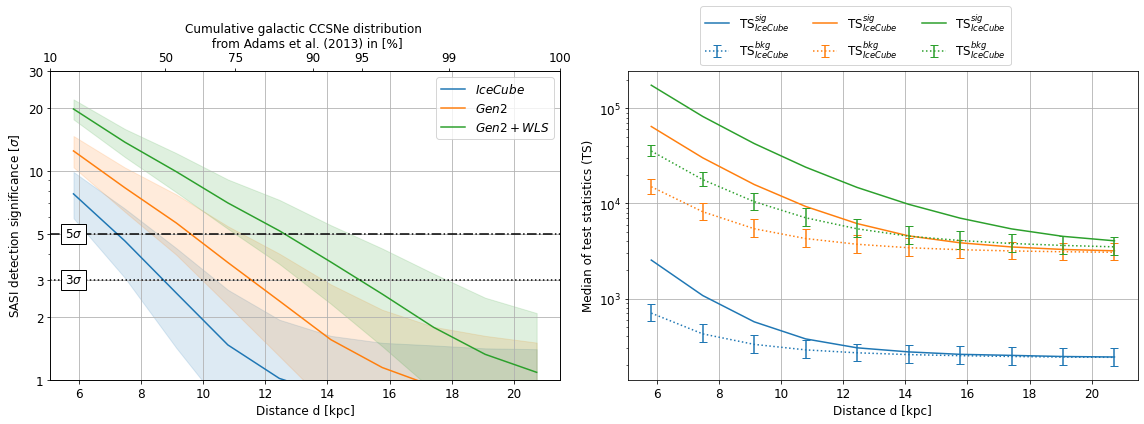

ic86
gen2
wls
3sig distance horizon IC86: 8.7 kpc
3sig distance horizon Gen2: 11.5 kpc
3sig distance horizon Gen2+WLS: 15.0 kpc
5sig distance horizon IC86: 7.2 kpc
5sig distance horizon Gen2: 9.6 kpc
5sig distance horizon Gen2+WLS: 12.6 kpc
Frequency: 220.0 Hz, Amplitude: 10.0 % 
Distance range: 5.5 kpc - 21.0 kpc
Distance: 5.5 kpc
Distance: 7.2 kpc
Distance: 9.0 kpc
Distance: 10.7 kpc
Distance: 12.4 kpc
Distance: 14.1 kpc
Distance: 15.8 kpc
Distance: 17.5 kpc
Distance: 19.2 kpc
Distance: 21.0 kpc


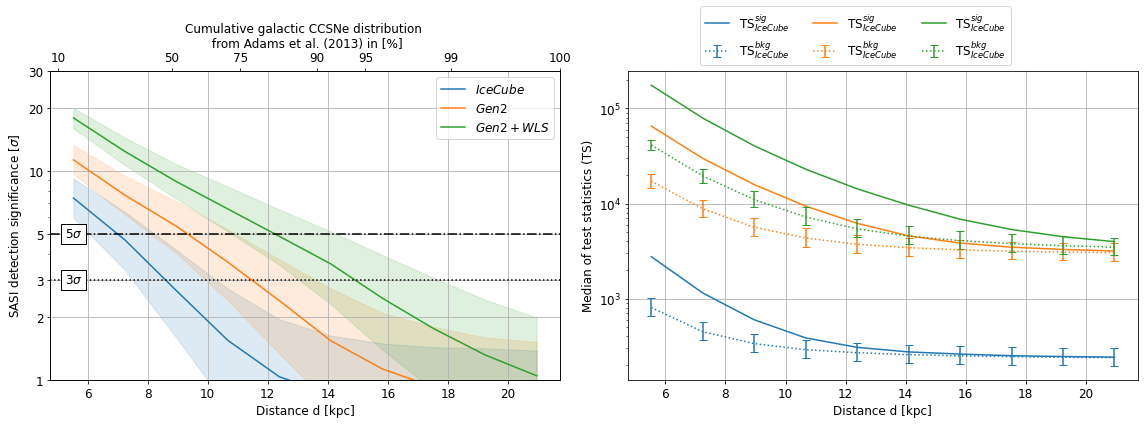

ic86
gen2
wls
3sig distance horizon IC86: 8.6 kpc
3sig distance horizon Gen2: 11.5 kpc
3sig distance horizon Gen2+WLS: 14.9 kpc
5sig distance horizon IC86: 7.0 kpc
5sig distance horizon Gen2: 9.3 kpc
5sig distance horizon Gen2+WLS: 12.2 kpc
Frequency: 230.0 Hz, Amplitude: 10.0 % 
Distance range: 5.9 kpc - 20.9 kpc
Distance: 5.9 kpc
Distance: 7.5 kpc
Distance: 9.2 kpc
Distance: 10.9 kpc
Distance: 12.5 kpc
Distance: 14.2 kpc
Distance: 15.9 kpc
Distance: 17.5 kpc
Distance: 19.2 kpc
Distance: 20.9 kpc


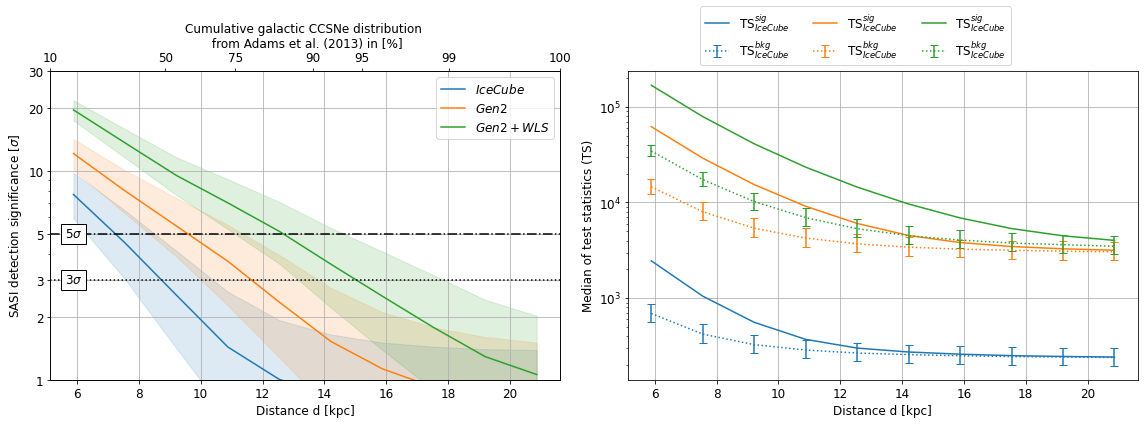

ic86
gen2
wls
3sig distance horizon IC86: 8.7 kpc
3sig distance horizon Gen2: 11.7 kpc
3sig distance horizon Gen2+WLS: 15.0 kpc
5sig distance horizon IC86: 7.2 kpc
5sig distance horizon Gen2: 9.6 kpc
5sig distance horizon Gen2+WLS: 12.7 kpc
Frequency: 240.0 Hz, Amplitude: 10.0 % 
Distance range: 5.4 kpc - 20.9 kpc
Distance: 5.4 kpc
Distance: 7.2 kpc
Distance: 8.9 kpc
Distance: 10.6 kpc
Distance: 12.3 kpc
Distance: 14.0 kpc
Distance: 15.8 kpc
Distance: 17.5 kpc
Distance: 19.2 kpc
Distance: 20.9 kpc


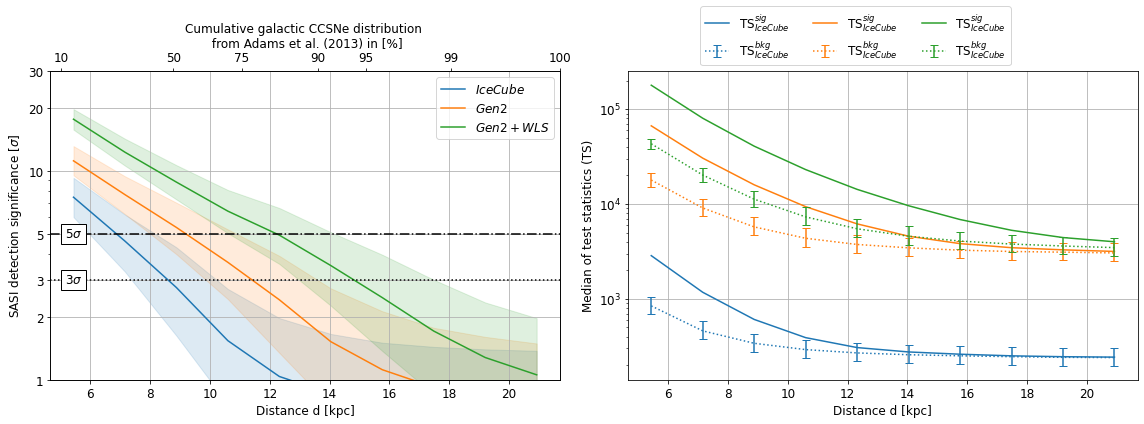

ic86
gen2
wls
3sig distance horizon IC86: 8.6 kpc
3sig distance horizon Gen2: 11.4 kpc
3sig distance horizon Gen2+WLS: 14.8 kpc
5sig distance horizon IC86: 6.9 kpc
5sig distance horizon Gen2: 9.2 kpc
5sig distance horizon Gen2+WLS: 12.2 kpc
Frequency: 250.0 Hz, Amplitude: 10.0 % 
Distance range: 5.8 kpc - 21.2 kpc
Distance: 5.8 kpc
Distance: 7.5 kpc
Distance: 9.2 kpc
Distance: 10.9 kpc
Distance: 12.6 kpc
Distance: 14.3 kpc
Distance: 16.0 kpc
Distance: 17.8 kpc
Distance: 19.5 kpc
Distance: 21.2 kpc


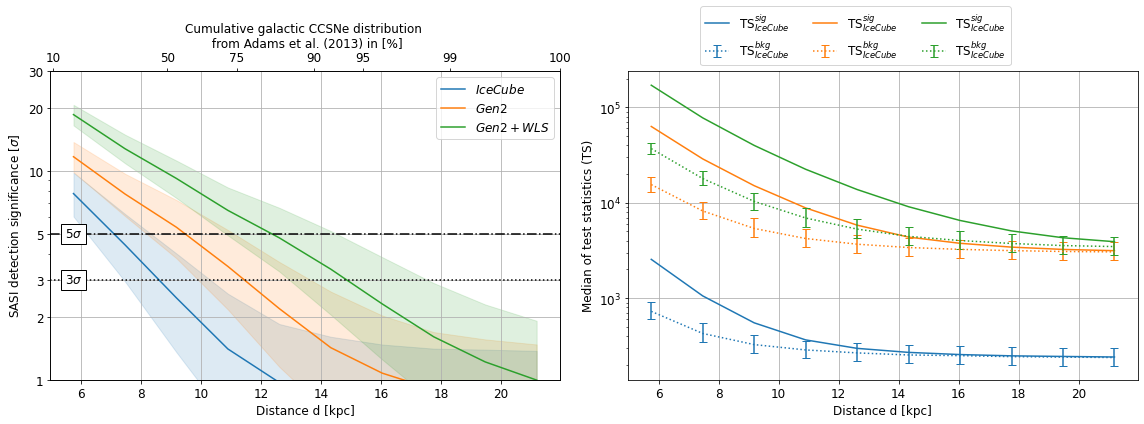

ic86
gen2
wls
3sig distance horizon IC86: 8.6 kpc
3sig distance horizon Gen2: 11.5 kpc
3sig distance horizon Gen2+WLS: 14.9 kpc
5sig distance horizon IC86: 7.1 kpc
5sig distance horizon Gen2: 9.5 kpc
5sig distance horizon Gen2+WLS: 12.4 kpc
Frequency: 260.0 Hz, Amplitude: 10.0 % 


KeyboardInterrupt: 

In [3]:
scan = Scan(sim, scan_para, ft_mode = "FFT", ft_para = fft_para, trials = trials, verbose = "debug")
scan.run_interpolate()
scan.reshape_data(item = scan.dist, filename = "./files/test_fft.npz")

In [ ]:
det = "ic86"
quan = 1
sig = 5
dist_cutoff = scan.dist_range[np.logical_and(scan.dist_range>0.5*u.kpc, np.where(np.isinf(scan.Zscore[det][2])==True, 0, 1))][0]
z = InterpolatedUnivariateSpline(x = scan.dist_range[scan.dist_range>=dist_cutoff], 
                                 y = scan.Zscore[det][quan][scan.dist_range>=dist_cutoff], k = 3, ext = 3)

root = brentq(loss_dist_horizon, a = 1, b = 200, args = (z, sig), xtol = 1e-2)
print(root)
#loss_dist_horizon(0.1, quan = z, sig = sig)

ValueError: f(a) and f(b) must have different signs

How much are my results limited by statistics? Run same model at same distance 100 times once with 1000 trials and once with 10,000 trials and see what the spread of the distribution is. This could give you an idea of how much the significance can vary between the range fit and the distance scan. This will then inform the criteria of the range fit (2.5 or 3 sigma, 5.5 or 6 sigma) etc.

In [ ]:
# reload data
data = np.load("./files/test_fft.npz")

ampl_range = data["ampl"]
freq_range = data["freq"]
sig_range = data["sig"]
quan_range = data["quan"]
dist_ic86 = data["ic86"]
dist_gen2 = data["gen2"]
dist_wls = data["wls"]


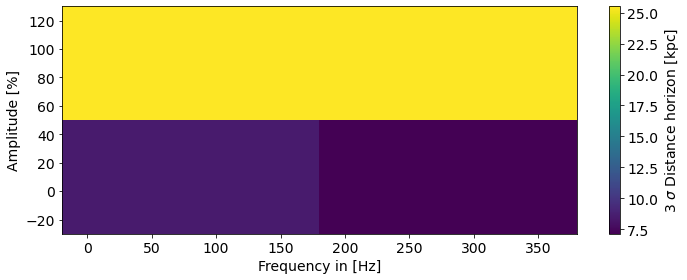

In [ ]:
plot_para_scan(ampl_range = ampl_range, freq_range=freq_range*u.Hz, data = dist_ic86[1,:,:,0])

In [ ]:
scan = Scan(sim, scan_para, ft_mode = "FFT", ft_para = fft_para, trials = trials, verbose = "debug")
scan.run_fit()

Frequency: 80.0 Hz, Amplitude: 10.0 % 
3sig ic86


KeyboardInterrupt: 

#TODO